In [187]:
pip install git+https://github.com/VLL-HD/FrEIA.git

  Cloning https://github.com/VLL-HD/FrEIA.git to /tmp/pip-req-build-34s5rbzo
  Running command git clone -q https://github.com/VLL-HD/FrEIA.git /tmp/pip-req-build-34s5rbzo


In [188]:
!git clone https://github.com/VLL-HD/conditional_INNs.git

Cloning into 'conditional_INNs'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 52 (delta 7), reused 49 (delta 5), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [189]:
cd conditional_INNs/mnist_minimal_example/

/content/conditional_INNs/mnist_minimal_example/conditional_INNs/mnist_minimal_example


In [190]:
import torchvision.datasets
import torchvision.transforms as T

data_dir = 'fashion_mnist_data'
train_data = torchvision.datasets.FashionMNIST(data_dir, train=True, download=True,transform=T.Compose([T.ToTensor(), lambda x: (x - data_mean) / data_std]))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fashion_mnist_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fashion_mnist_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fashion_mnist_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fashion_mnist_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashion_mnist_data/FashionMNIST/raw



In [191]:
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

batch_size = 256
data_mean = 0.128
data_std = 0.305
train_loader  = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [192]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


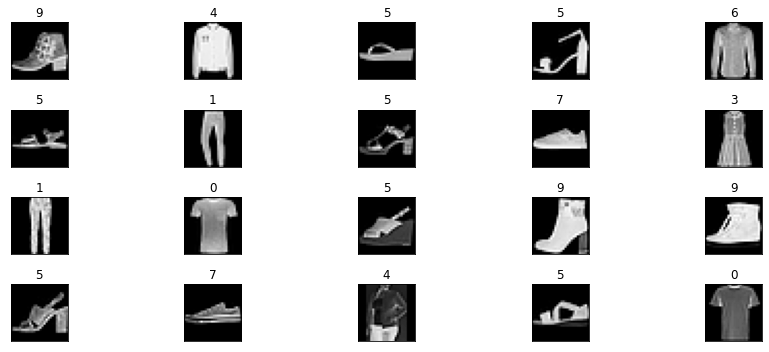

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
print(dataiter)
images, labels = dataiter.next()


fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  ax = fig.add_subplot(4, 20/4, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title(labels[idx].item())
  fig.tight_layout()

In [194]:
shirt_label = labels[1]

In [195]:
shirt_label.cuda()

tensor(4, device='cuda:0')

In [196]:
shirt = images[1]

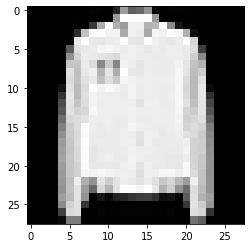

In [197]:
plt.imshow(np.squeeze(shirt), cmap='gray')

In [ ]:
!python train.py

In [175]:
N_samples = 1
l_shirt = torch.cuda.LongTensor(N_samples)
l_shirt[:] = shirt_label_2

In [176]:
l_shirt

tensor([0], device='cuda:0')

In [177]:
shirt_label_2

tensor(0)

In [150]:
z_example = 1.0 * torch.randn(100, model.ndim_total).cuda()

Validation loss:
-1.7099406719207764


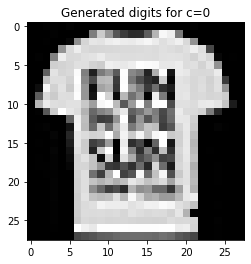

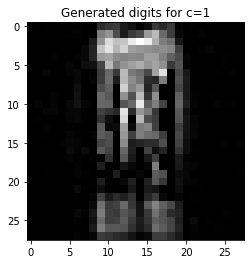

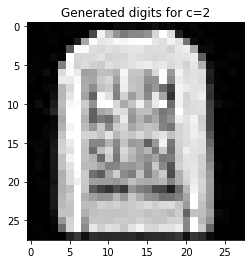

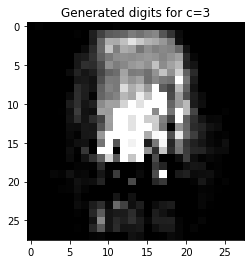

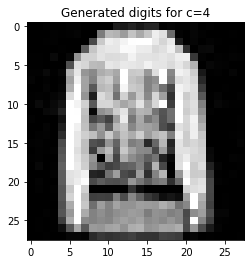

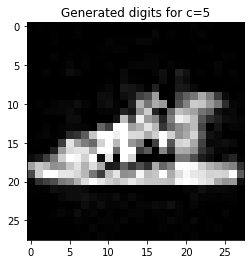

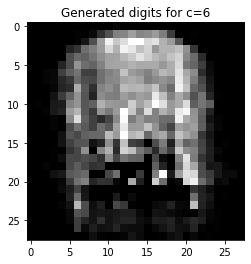

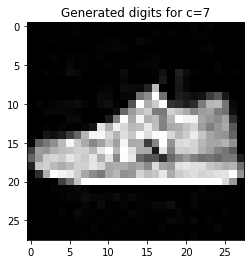

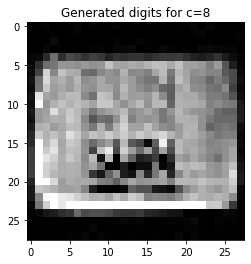

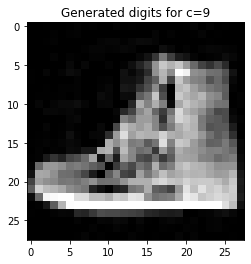

In [183]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import model
import data

cinn = model.MNIST_cINN(0)
cinn.cuda()
state_dict = {k:v for k,v in torch.load('output/mnist_cinn.pt').items() if 'tmp_var' not in k}
cinn.load_state_dict(state_dict)

cinn.eval()

def show_samples(label):
    '''produces and shows cINN samples for a given label (0-9)'''
    
    N_samples = 1
    l = torch.cuda.LongTensor(N_samples)
    l[:] = label

    z = cinn(shirt.to(l_shirt.device), l_shirt)[0]

    with torch.no_grad():
        samples = cinn.reverse_sample(z, l)[0].cpu().numpy()
        samples = data.unnormalize(samples)

    full_image = np.zeros((28, 28))

    for k in range(N_samples):
        i, j = k // 10, k % 10
        full_image[28 * i : 28 * (i + 1),
                   28 * j : 28 * (j + 1)] = samples[k, 0]

    full_image = np.clip(full_image, 0, 1)
    plt.figure()
    plt.title(F'Generated digits for c={label}')
    plt.imshow(full_image, vmin=0, vmax=1, cmap='gray')

def val_loss():
    '''prints the final validiation loss of the model'''

    with torch.no_grad():
        z, log_j = cinn(data.val_x, data.val_l)
        nll_val = torch.mean(z**2) / 2 - torch.mean(log_j) / model.ndim_total

    print('Validation loss:')
    print(nll_val.item())

val_loss()

for i in range(10):
    show_samples(i)

plt.show()